In [114]:
PATH = r'..\data\processed\02_preprocced.csv'
MODEL_PATH = r'..\models\mnb.pkl'
BOW_PATH = r'..\models\BOW.pkl'

In [81]:
!pip install  xgboost
from xgboost import XGBClassifier


You should consider upgrading via the 'c:\users\oem\anaconda3\python.exe -m pip install --upgrade pip' command.


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



# from keras.utils import plot_model

import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from imblearn.over_sampling import  SMOTE



In [3]:
df = pd.read_csv(PATH)

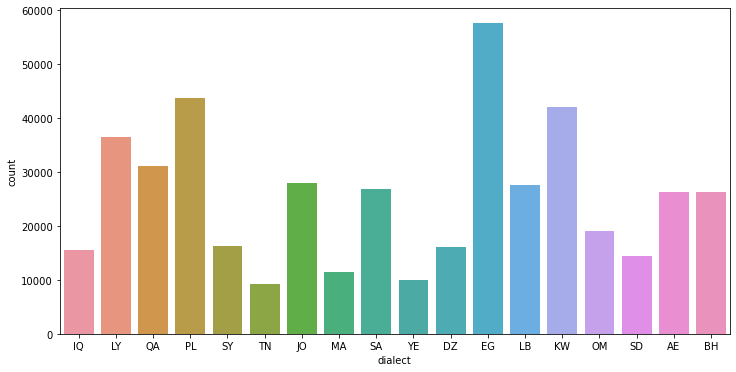

In [86]:
plt.figure(figsize=(12,6))
g = sns.countplot(data=df, x='dialect')

plt.show(g)

This graph show Imblanced data

In [91]:
bow = CountVectorizer(min_df=6)
X = bow.fit_transform(df['tweet_text'])

In [36]:
X.shape

(458194, 72950)

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,df['dialect'],test_size=0.03,shuffle = True)

In [61]:

mnb = MultinomialNB()
parameters={'alpha': (0.1, 0.2,0.15,0.19,0.13,0.19,0.21,.25)}
grid_search= GridSearchCV(mnb,parameters )

In [62]:
grid_search.fit(X_under,y_under) # search to find best paramter
grid_search.best_params_

{'alpha': 0.25}

In [58]:
X_under, y_under = SMOTE(random_state=0).fit_resample(X_train,y_train)

In [96]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [97]:
y_pred = mnb.predict(X_test)
print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          AE       0.44      0.42      0.43       788
          BH       0.38      0.38      0.38       809
          DZ       0.67      0.54      0.60       495
          EG       0.67      0.89      0.76      1682
          IQ       0.76      0.54      0.63       475
          JO       0.45      0.28      0.35       892
          KW       0.46      0.58      0.51      1254
          LB       0.64      0.68      0.66       788
          LY       0.67      0.72      0.70      1106
          MA       0.83      0.61      0.71       373
          OM       0.47      0.31      0.37       535
          PL       0.46      0.62      0.53      1333
          QA       0.43      0.52      0.47       897
          SA       0.43      0.45      0.44       802
          SD       0.83      0.56      0.67       432
          SY       0.58      0.26      0.36       503
          TN       0.79      0.39      0.52       297
          YE       0.52    

<AxesSubplot:>

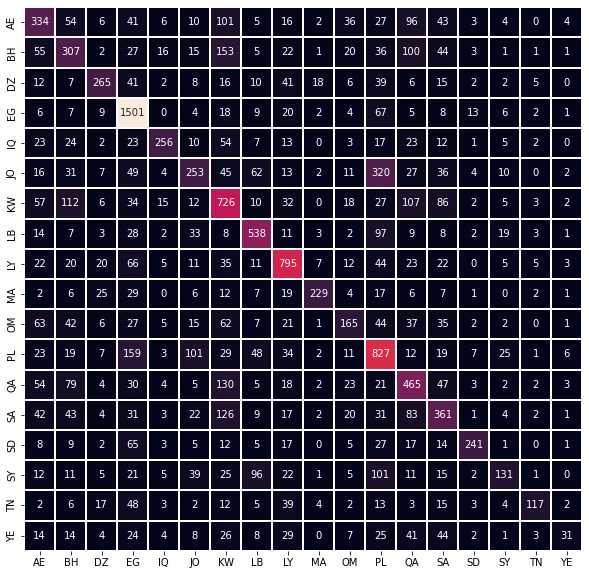

In [108]:
labels = np.unique(y_test)
cf_matrix = sklearn.metrics.confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g',xticklabels=labels, yticklabels=labels,cbar=False,annot_kws={"fontsize":10})

In [84]:
lnsvm = LinearSVC()
lnsvm.fit(X_train,y_train)

C:\Users\oem\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [85]:
y_pred = lnsvm.predict(X_test)
print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          AE       0.39      0.39      0.39       773
          BH       0.35      0.34      0.35       746
          DZ       0.53      0.54      0.53       484
          EG       0.70      0.79      0.74      1743
          IQ       0.52      0.48      0.50       456
          JO       0.42      0.36      0.38       867
          KW       0.49      0.52      0.50      1276
          LB       0.60      0.66      0.63       832
          LY       0.64      0.66      0.65      1136
          MA       0.59      0.57      0.58       350
          OM       0.33      0.31      0.32       547
          PL       0.46      0.49      0.48      1287
          QA       0.45      0.43      0.44       925
          SA       0.40      0.39      0.40       806
          SD       0.59      0.55      0.57       406
          SY       0.40      0.32      0.35       530
          TN       0.54      0.46      0.50       283
          YE       0.24    

In [115]:
pickle.dump(mnb, open(MODEL_PATH, 'wb'))
pickle.dump(bow, open(BOW_PATH, 'wb'))

In [119]:
test = bow.transform(['lv,h','جدا','احبك'])

In [120]:
test.shape

(3, 72950)